In [1]:
%matplotlib inline

from pymongo import MongoClient
import urllib.parse

import os
import sys
import json
from json import dumps

# From within the docker-compose application, use "mongodb_container", for local development use "localhost"
dbServer = os.getenv("MONGO_DB_SERVER", "mongodb_container:27017")
dbUser = os.getenv("MONGO_USERNAME", "root")
dbPW = os.getenv("MONGO_PASSWORD", "rootpassword")

client = MongoClient(dbServer, username=dbUser, password=dbPW)

print("Mongo DB Connection -----")
print("server:" + dbServer)
print("user:" + dbUser)

collection = client.images.images

Mongo DB Connection -----
server:localhost:27017
user:root


In [2]:
def imagelistpage(page_id: int):
    pagesize = 50
    skipoffset = (page_id - 1) * pagesize
    data = []
    for image in (
        collection.find(
            {},
            {
                "datasetprovider": 1,
                "filenameHash": 1,
                "datasetname": 1,
                "imageFilename": 1,
                "timestamp": 1,
                "velocity_lon": 1,
                "yolov5": 1,
                "_id": 0,
            },
        )
        .skip(skipoffset)
        .limit(pagesize)
    ):
        data.append(image)

    returnString = data
    return returnString

imagelistpage(1)

[{'yolov5': [{'xmin': 811.3444213867,
    'ymin': 175.2196044922,
    'xmax': 1045.8420410156,
    'ymax': 257.777130127,
    'confidence': 0.8279135823,
    'class': 2,
    'name': 'car'},
   {'xmin': 667.2761230469,
    'ymin': 159.9250183105,
    'xmax': 696.0545654297,
    'ymax': 249.7226257324,
    'confidence': 0.7753795981,
    'class': 0,
    'name': 'person'},
   {'xmin': 357.2906799316,
    'ymin': 171.1922302246,
    'xmax': 385.0157470703,
    'ymax': 243.0052947998,
    'confidence': 0.7487267852,
    'class': 0,
    'name': 'person'},
   {'xmin': 1105.71875,
    'ymin': 172.331817627,
    'xmax': 1150.4833984375,
    'ymax': 277.0250854492,
    'confidence': 0.4397753477,
    'class': 0,
    'name': 'person'},
   {'xmin': 715.9765625,
    'ymin': 171.1492462158,
    'xmax': 769.1544189453,
    'ymax': 202.370803833,
    'confidence': 0.4357422888,
    'class': 2,
    'name': 'car'},
   {'xmin': 568.9707641602,
    'ymin': 168.2324371338,
    'xmax': 580.3513183594,
    '

In [3]:
def find_velocity(min_velocity):
    data = []
    for image in (
        collection.find(
            {"velocity_lon": {"$gt": min_velocity}},
            {
                "datasetprovider": 1,
                "filenameHash": 1,
                "imageFilename": 1,
                "timestamp": 1,
                "velocity_lon": 1,
                "_id": 0,
            },
        )
    ):
        data.append(image)

    returnString = data
    return returnString

find_velocity(12.0)

[{'datasetprovider': 'Kitti',
  'imageFilename': '0000000034.png',
  'filenameHash': '6100e666bbc6af5542b61d9c219149ae',
  'velocity_lon': 12.526054476559,
  'timestamp': '2011-09-26 13:02:47.845240'},
 {'datasetprovider': 'Kitti',
  'imageFilename': '0000000040.png',
  'filenameHash': '8f85686dc368d04cdbe41fd3db3934be',
  'velocity_lon': 12.029431240897,
  'timestamp': '2011-09-26 13:02:48.465296'},
 {'datasetprovider': 'Kitti',
  'imageFilename': '0000000048.png',
  'filenameHash': '16942c79aebfe60e1404a4fee03974df',
  'velocity_lon': 12.231652315764,
  'timestamp': '2011-09-26 13:02:49.285357'},
 {'datasetprovider': 'Kitti',
  'imageFilename': '0000000060.png',
  'filenameHash': '2250511f74fc65923ac6176895da6ec7',
  'velocity_lon': 12.326531023353,
  'timestamp': '2011-09-26 13:02:50.525437'},
 {'datasetprovider': 'Kitti',
  'imageFilename': '0000000068.png',
  'filenameHash': 'bc9c9072c1873d051e6f61c560db513f',
  'velocity_lon': 12.098651535142,
  'timestamp': '2011-09-26 13:02:51.

In [4]:
def find_yolo(class_label):
    data = []
    for image in (
        collection.find(
            {"yolov5": {"$elemMatch": { "name": class_label}}},
            {
                "datasetname" : 1,
                "filenameHash" : 1,
                "yolov5": 1,
                "_id": 0,
            },
        )
    ):
        data.append(image)

    returnString = data
    return returnString

find_yolo('skateboard')

[{'yolov5': [{'xmin': 0.0651023611,
    'ymin': 178.510925293,
    'xmax': 81.6526947021,
    'ymax': 353.4594421387,
    'confidence': 0.8975694776,
    'class': 0,
    'name': 'person'},
   {'xmin': 1016.3673706055,
    'ymin': 177.0068969727,
    'xmax': 1223.5841064453,
    'ymax': 359.0989074707,
    'confidence': 0.8924584389,
    'class': 2,
    'name': 'car'},
   {'xmin': 655.5133056641,
    'ymin': 159.4781799316,
    'xmax': 681.744140625,
    'ymax': 241.6158905029,
    'confidence': 0.7210207582,
    'class': 0,
    'name': 'person'},
   {'xmin': 702.4283447266,
    'ymin': 158.8200836182,
    'xmax': 730.6013793945,
    'ymax': 228.6539611816,
    'confidence': 0.4369848669,
    'class': 0,
    'name': 'person'},
   {'xmin': 532.1630859375,
    'ymin': 157.2346496582,
    'xmax': 553.1131591797,
    'ymax': 211.1421051025,
    'confidence': 0.3884727955,
    'class': 0,
    'name': 'person'},
   {'xmin': 0.5812119246,
    'ymin': 319.0174865723,
    'xmax': 83.1289672852,


In [5]:
def distinct_datasetsnames():
    data = []
    result=collection.distinct("datasetname"),
    data.append(result)

    returnString = data
    return returnString

distinct_datasetsnames()

[(['2011_09_26_drive_0002_sync',
   '2011_09_26_drive_0096_sync',
   '2011_09_28_drive_0047_sync'],)]

In [6]:
def distinct_yolo_classes():
    data = []
    result=collection.distinct("yolov5.name"),
    data.append(result)

    returnString = data
    return returnString

distinct_yolo_classes()

[(['backpack',
   'bench',
   'bicycle',
   'bus',
   'car',
   'fire hydrant',
   'motorcycle',
   'parking meter',
   'person',
   'skateboard',
   'stop sign',
   'traffic light',
   'train',
   'truck'],)]

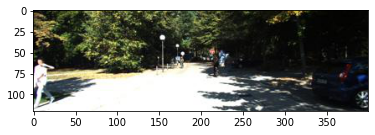

In [7]:
import matplotlib.pyplot as plt

def show_image(filenameHash):
    url = 'http://localhost:8000/imagethumbnail/'+filenameHash
    f = urllib.request.urlopen(url)
    a=plt.imread(f, format='JPG')
    plt.imshow(a)
    
show_image('73b71cfcd213b9f75055dd9e7d327803')
